In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.graph_objects as go
from mpl_finance import candlestick2_ohlc, volume_overlay2, plot_day_summary_oclh

# import data_files

# import codecs
# import talib

In [67]:
import os

class data:
    def __init__(self):
        self.files = []
        for file in os.listdir():
            if file[-4:] == '.csv':
                self.files.append(file)
        print('Доступные файлы:', self.files)

    def read_csv(self, file_num=0):
        self.file_name = self.files[file_num]

        split_datas = self.file_name.split('_')
        self.ticker = split_datas[0]
        self.interval = split_datas[1]
        self.start_data = split_datas[2]
        self.end_data = split_datas[3].split('.')[0]

        self.table = pd.read_csv(self.file_name)

    def get_info(self):
        print("Тикер: ", self.ticker)
        print("Интервал: ", self.interval)
        print("Дата начала:", self.start_data)
        print("Дата конца:", self.end_data)

    def plot_table(self, start=0, end=60):
        fig, ax = plt.subplots(2, sharex=True, figsize=(20, 12))        
        # ax[0].xaxis.set_major_locator(ticker.MaxNLocator(60))
        # ax[0].yaxis.set_major_locator(ticker.MaxNLocator(5))
        # ax[1].yaxis.set_major_locator(ticker.MaxNLocator(5))

        candlestick2_ohlc(
            ax[0], self.table['open'][start:end],
            self.table['high'][start:end],
            self.table['low'][start:end],
            self.table['close'][start:end],
            width=0.6, colorup='#77d879', colordown='#db3f3f')
        
        ax[0].set_xticks(range(start, end, 5)) 
        ax[0].set_xticklabels(self.table['begin'][start:end:5]) 

        fig.autofmt_xdate(rotation=90)
        fig.tight_layout()
        
        plt.grid()
        plt.show() 

Доступные файлы: ['SBER_60_2023-11-10_2024-11-09.csv']
Тикер:  SBER
Интервал:  60
Дата начала: 2023-11-10
Дата конца: 2024-11-09


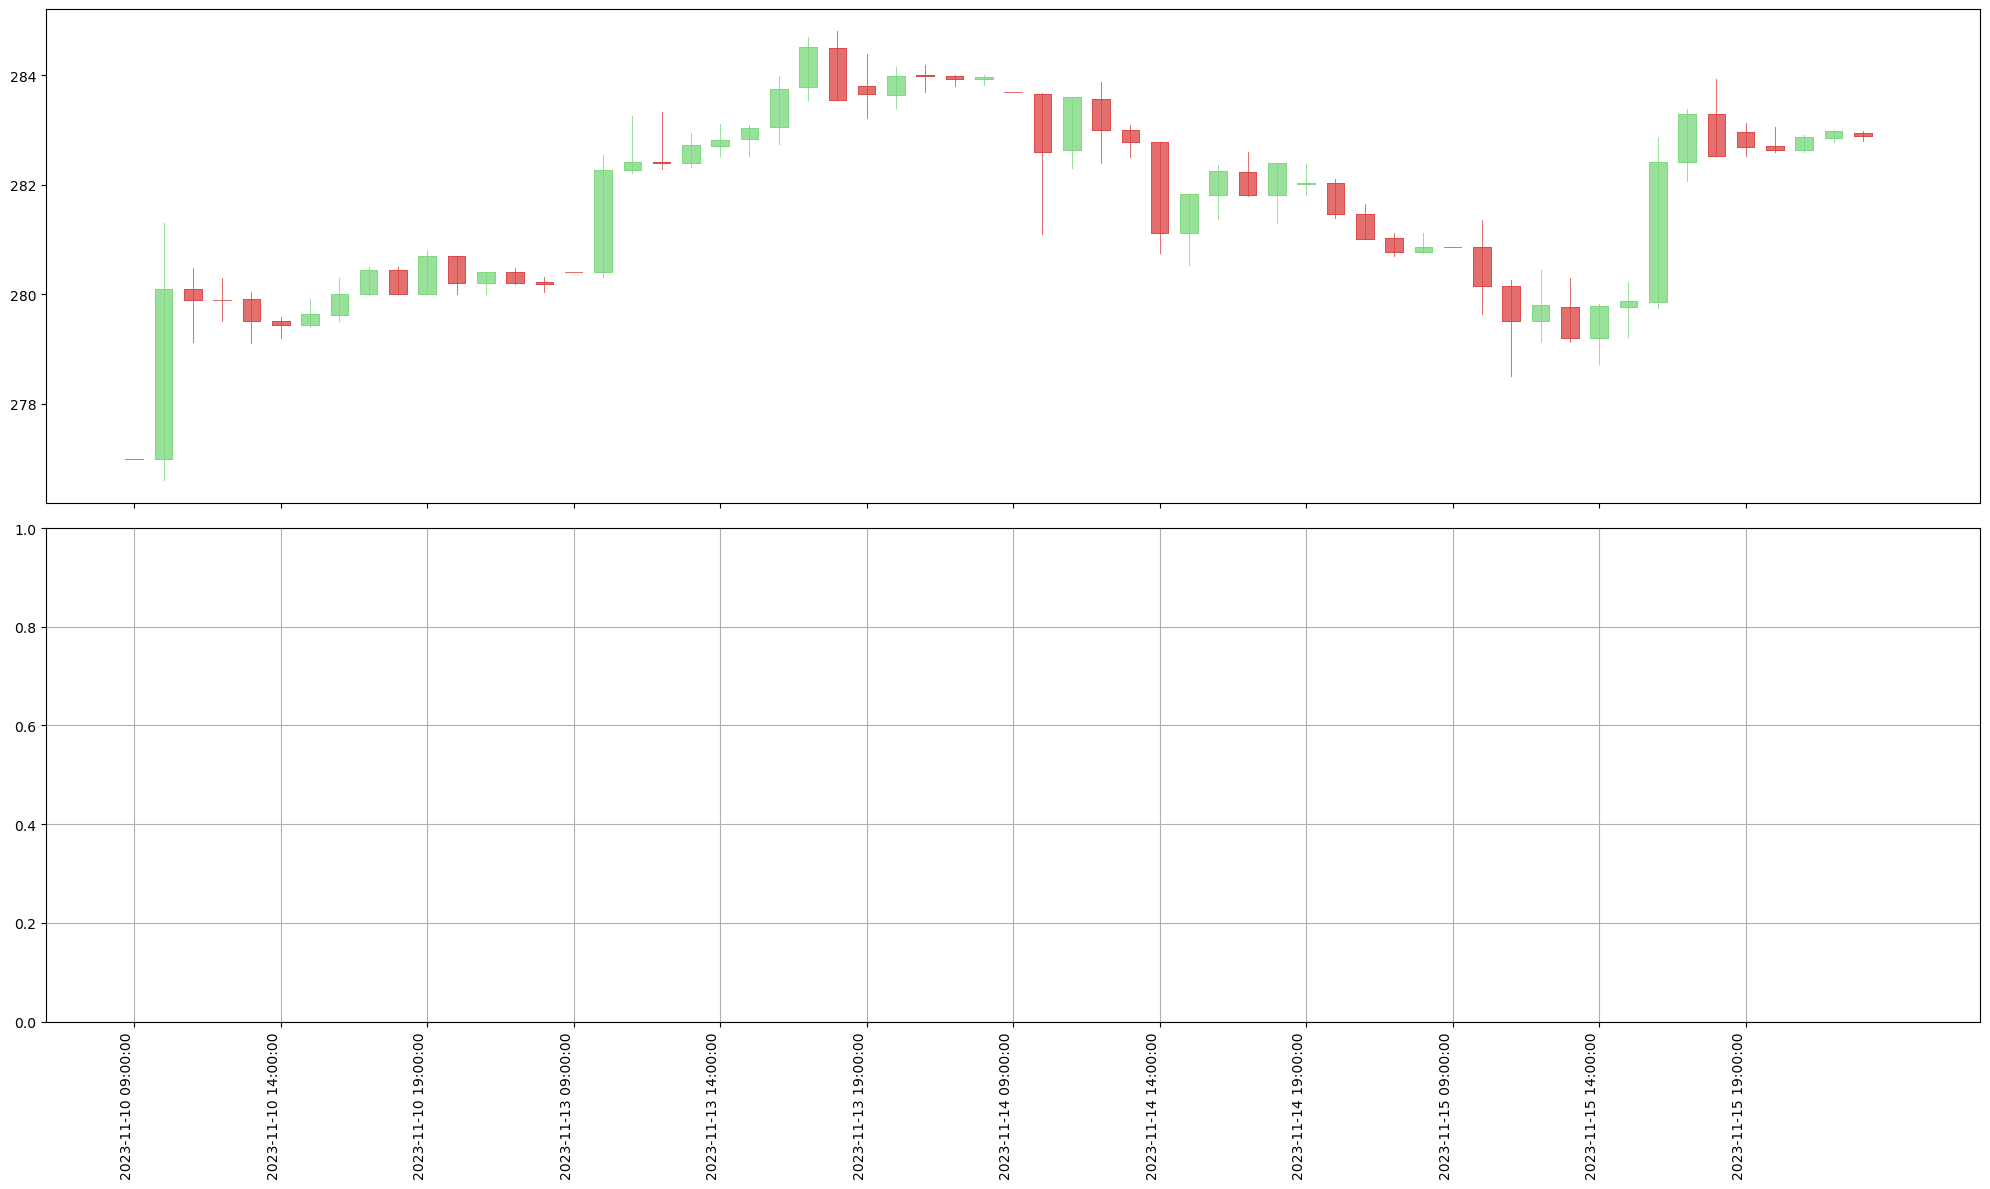

In [68]:
data = data()
data.read_csv()
data.get_info()
data.plot_table()

In [22]:
data.table

,begin,open,close,high,low,value,volume
0,2023-11-10 09:00:00,276.99,276.99,276.99,276.99,1.192996e+07,43070
1,2023-11-10 10:00:00,276.99,280.09,281.30,276.60,4.983073e+09,17835820
2,2023-11-10 11:00:00,280.09,279.89,280.47,279.12,1.503269e+09,5375140
3,2023-11-10 12:00:00,279.90,279.90,280.30,279.50,9.214569e+08,3291130
4,2023-11-10 13:00:00,279.91,279.50,280.03,279.11,8.273971e+08,2959960
...,...,...,...,...,...,...,...
3816,2024-11-08 19:00:00,252.99,254.46,254.65,252.93,1.388047e+09,5466020
3817,2024-11-08 20:00:00,254.50,254.55,254.89,254.01,6.596068e+08,2590450
3818,2024-11-08 21:00:00,254.54,254.51,254.68,254.03,2.491793e+08,979580
3819,2024-11-08 22:00:00,254.52,255.75,255.96,254.50,6.723403e+08,2633440
